In [20]:
# Import libraries
import numpy as np
from scipy.stats import norm
from scipy.spatial import distance

import matplotlib
#making default font bigger
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 20}

matplotlib.rc('font', **font)
import matplotlib.pyplot as plt


# I. Transformations of Guassian



## 1. Linear transformation

If normal random variable $\xi \sim \mathcal{N}(\mu, \Sigma)$, then their linear transformation will also be a normal random variable:

$$
\hat{\xi} = A \xi + b,\\
\hat{\xi} \sim \mathcal{N}(A\mu + b, A \Sigma A^T)
$$

Let's generate new gaussian $\xi \sim \mathcal{N}(\mu, \Sigma)$, where

$$
\mu = [0,0]^T\\
\Sigma = 
\left[
\begin{array}{cc}
    1&0 \\
    0&1 \\
\end{array}
\right]
$$

findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

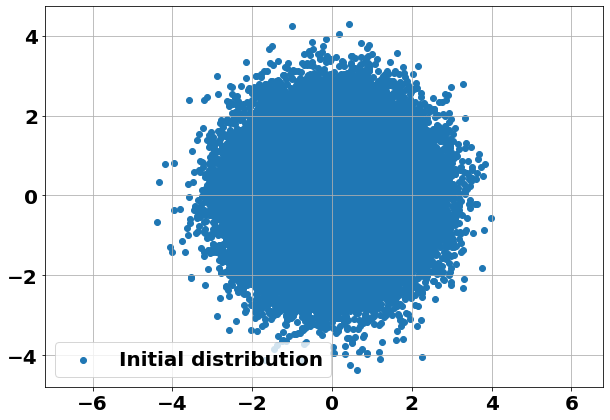

In [23]:
# number of samples from distribution
n = 1000_00

## new mean and covariance here
mean = np.array([0, 0]) #  <--- put your code here

cov = np.eye(2) #  <--- put your code here

# generate point cloud
cloud = np.random.multivariate_normal(mean, cov, n) #  <--- put your code here

# plot scatterplot of the initial cloud
plt.figure(figsize=(10,7))
plt.scatter(cloud[:,0], cloud[:,1],label='Initial distribution')
plt.axis('equal')
plt.legend()
plt.grid()

Let's iteratively apply affine transformation and see how the initial cloud will propagate. Let's use the following:

$$
A =
\left[
\begin{array}{cc}
1.5 & 1 \\
0 & 1.7\\
\end{array}
\right]\\
b = \left[
\begin{array}{c}
7\\
0\\
\end{array}
\right]\\
$$

In [24]:
# define affine tranform x' = Ax + b here
def linear_transform(cloud):
    A = np.array([[1.5, 1], [0, 1.7]])
    b = np.array([[7], [0]])
    result = (A@cloud.transpose() + b).transpose() # <-- put your code here
    return result

In [25]:
cloud.shape

(100000, 2)

In [26]:
transform_cloud = linear_transform(cloud)

**Plot initial distribution and transformed distribution:**

findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

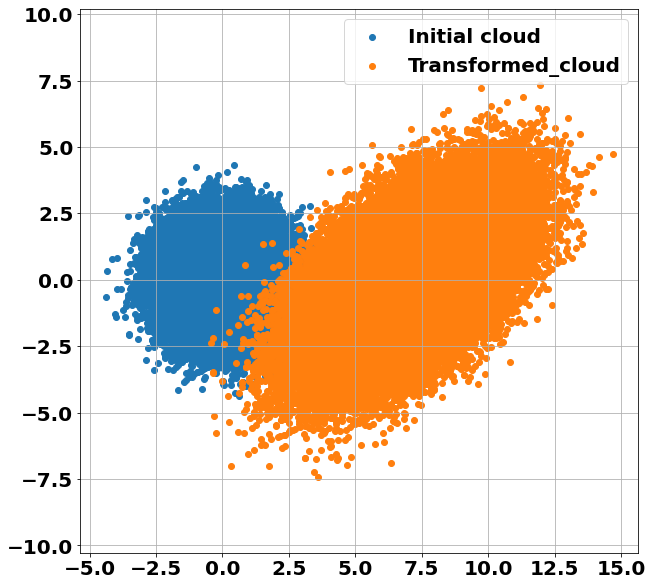

In [27]:
# put code here
# ....
plt.figure(figsize = (10, 10))
plt.scatter(cloud[:,0], cloud[:,1], label ='Initial cloud')
plt.scatter(transform_cloud[:,0], transform_cloud[:,1], label ='Transformed_cloud')
plt.axis('equal')
plt.grid()
plt.legend()



Let's use analytical expression for mean and covariance propagation for linear case:

$$
\hat{\mu} = A \mu + b\\
\hat{\Sigma} = A\Sigma A^T
$$

In [28]:
# using analytical expressions propagate mean and covariance once
# put your code here
# ...
mu  = linear_transform(mean.reshape(2,-1).transpose())
print('mu =', mu)
A = np.array([[1.5, 1],[0,1.7]])

sigma = A @ cov @ A. transpose()
print('sigma = \n', sigma)

mu = [[7. 0.]]
sigma = 
 [[3.25 1.7 ]
 [1.7  2.89]]


In [29]:
# calculate sample mean and covariance for propagated cloud
# put your code here
# ...
sample_mu = transform_cloud.mean(axis = 0)
print('sample_mu = ', sample_mu)

sample_sigma = np.cov(transform_cloud.transpose())
print('sample_sigma = ', sample_sigma)

sample_mu =  [ 6.99620531e+00 -6.13299702e-03]
sample_sigma =  [[3.24524651 1.70461826]
 [1.70461826 2.8764173 ]]


In [30]:
# calculate and print errors (L2-norm) between sample and analytical mean and covariace
# put code here
# ...
print('L2 error for mean = ', np.linalg.norm(sample_mu - mu))
print('L2 error for covariance = ', np.linalg.norm(sample_sigma - sigma))

L2 error for mean =  0.007212024912487978
L2 error for covariance =  0.015803227806629083


## 1.1 Sequence of transformations

findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

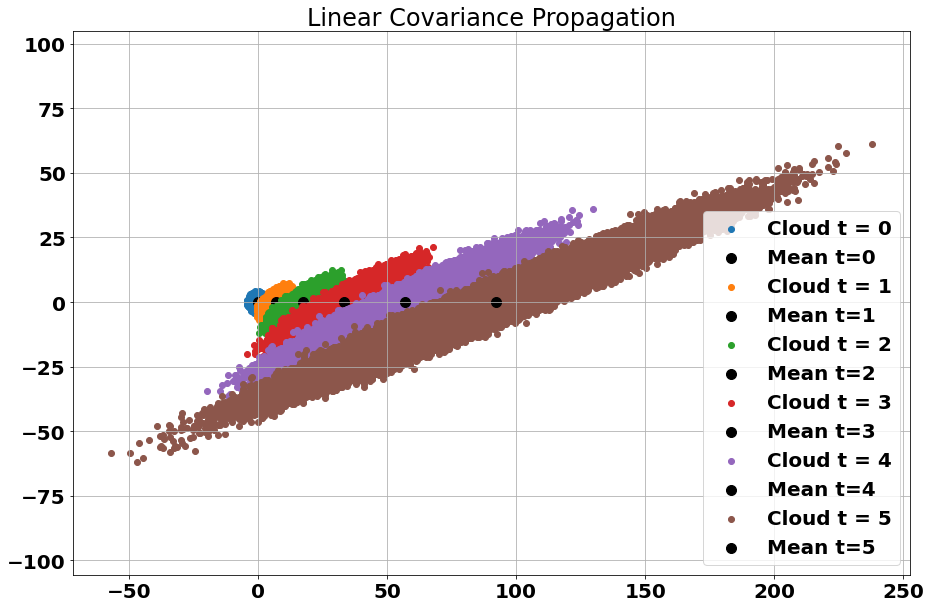

In [31]:
# do N = 5 iterations of propagation
N = 5

plt.figure(figsize=(15,10))
plt.title("Linear Covariance Propagation")

propagated_cloud = cloud # initializing the cloud
means = [cloud.mean(axis=0)] # save means here
covariances = [np.cov(cloud.transpose())] # save covariances here

plt.scatter(propagated_cloud[:,0], propagated_cloud[:,1],label=f'Cloud t = {0}')
plt.scatter(means[-1][0], means[-1][1], marker='o', color='black', s=100, label=f'Mean t={0}')

#propagating for-loop here
for i in range(N):
    propagated_cloud = linear_transform(propagated_cloud)
    plt.scatter(propagated_cloud[:,0], propagated_cloud[:,1],label=f'Cloud t = {i+1}')
    means.append(propagated_cloud.mean(axis=0))
    covariances.append(np.cov(propagated_cloud.transpose()))
    plt.scatter(means[-1][0], means[-1][1], marker='o', color='black', s=100, label=f'Mean t={i+1}')
    
plt.axis('equal')
plt.legend()
plt.grid()

In [32]:
# propagate the same gaussian but compute mean and covariance updates analytically
# print L2 norm of difference between sample mean / covariance and analytical mean / covariance

# put code here
A = np.array([[1.5, 1], [0, 1.7]])
b = np.array([[7], [0]])
tmp = mean.reshape(2,-1)
analytical_mean = [tmp] # store all results in this list
for i in range(len(means)):
    print(f't = {i}, error L2 norm for mean = {np.linalg.norm(means[i].reshape(2,-1) - tmp)}')
    tmp = A @ tmp + b

t = 0, error L2 norm for mean = 0.003609799635050647
t = 1, error L2 norm for mean = 0.007212024912487978
t = 2, error L2 norm for mean = 0.015764984562799535
t = 3, error L2 norm for mean = 0.03327676991616832
t = 4, error L2 norm for mean = 0.06711394048243392
t = 5, error L2 norm for mean = 0.13055465492680352


In [33]:
# calcuate the L2 norm of difference between 
tmp = cov
for i in range(len(covariances)):
    print(f't = {i}, error L2 norm for covariance = {np.linalg.norm(covariances[i] - tmp)}')
    tmp = A@tmp@A.transpose()

t = 0, error L2 norm for covariance = 0.010712483817503286
t = 1, error L2 norm for covariance = 0.015803227806629083
t = 2, error L2 norm for covariance = 0.04365243570537246
t = 3, error L2 norm for covariance = 0.20120268651943374
t = 4, error L2 norm for covariance = 0.9328464723264566
t = 5, error L2 norm for covariance = 3.9553397241139314


**Why there is an error? How we can reduce it?**

## 2. Nonlinear transformations

Let's consider `exp()` as our non-linear function:

$$
y := exp(x) + b
$$

where $exp(x) := [exp(x_1), exp(x_2)]^T$ and $b$ is a constant vector and:

$$
b = [4,0]^T
$$

Generate new zero-mean point cloud with small covariance:

$$
\Sigma = 
\left[
\begin{array}{cc}
0.1 & 0\\
0 & 0.1\\
\end{array}
\right]
$$

findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

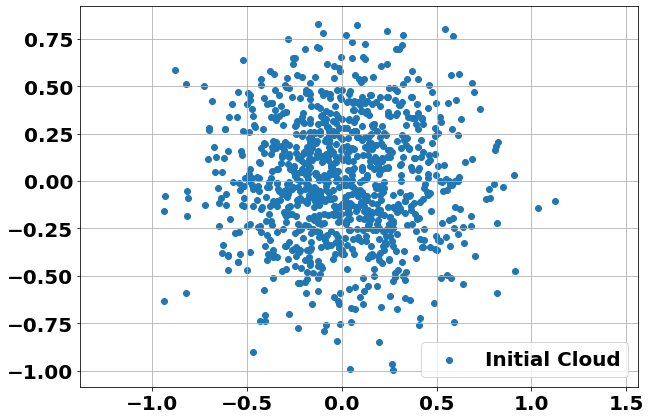

In [53]:
# number of samples
n = 1000

## new mean and covariance here
mean = np.array([0, 0]) #  <--- put your code here
cov = np.eye(2) * 1e-1 #  <--- put your code here

cloud = np.random.multivariate_normal(mean, cov, n) #  <--- put your code here

# plotting the initial cloud
plt.figure(figsize=(10,7))
plt.scatter(cloud[:,0], cloud[:,1],label='Initial Cloud')
plt.axis('equal')
plt.legend()
plt.grid()

**Define the non-linear transformation here:**

In [54]:
# put your code here

def nonlinear_transformation(pts):
    b = np.array([[4], [0]])
    result = (np.exp(pts).transpose() + b).transpose() # <--- put your code here
    return result


def jacobian_nonlinear_transformation(pt):
    result = np.zeros((2, 2)) # <--- put your code here
    result[0, 0] = np.exp(pt[0])
    result[1, 1] = np.exp(pt[1])
    return result

In [55]:
jacobian_nonlinear_transformation(mean)

array([[1., 0.],
       [0., 1.]])

**Apply non-linear transformation to initial cloud and plot initial and propagated cloud:**

findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

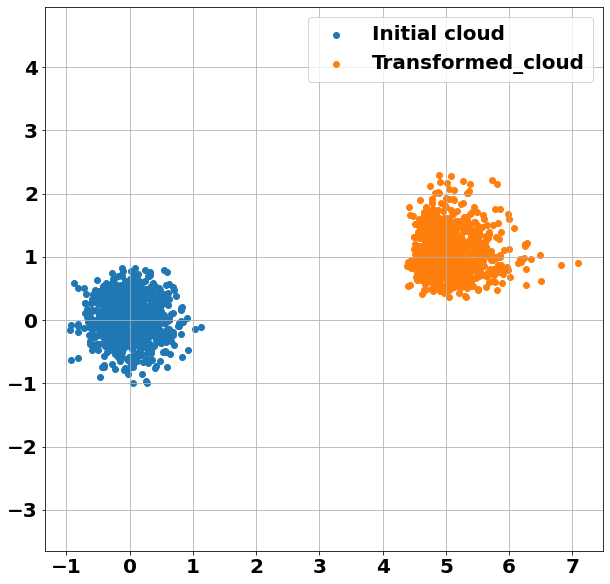

In [56]:
# put your code here
transform_cloud = nonlinear_transformation(cloud)
plt.figure(figsize = (10, 10))
plt.scatter(cloud[:,0], cloud[:,1], label ='Initial cloud')
plt.scatter(transform_cloud[:,0], transform_cloud[:,1], label ='Transformed_cloud')
plt.axis('equal')
plt.grid()
plt.legend()

For non-linear transformation $f$ to propagate a gaussian the linearization is done:

$$
\hat{\mu} = f(\mu)\\
\hat{\Sigma} = J \Sigma J^T, \text{where $J = \nabla f = \left[\dfrac{df}{dx_i}\right]$ - Jacobian of $f$}.
$$

**Compute the Jacobian:**

In [57]:
J = jacobian_nonlinear_transformation(mean) # <--- put your code here

**Propagate the mean:**

In [83]:
mu = nonlinear_transformation(mean.reshape(-1, 2))# <--- put your code here
mu

array([[5., 1.]])

**Propagate the covariance:**

In [77]:
sigma =  J @ cov @ J.transpose() # <--- put your code here
sigma

array([[0.1, 0. ],
       [0. , 0.1]])

**Error for mean:**

In [78]:
print('L2 error for mean = ', np.linalg.norm(transform_cloud.mean(axis = 0) - mu))# <--- put your code here

L2 error for mean =  0.0810244241146065


**Error for covariance:**

In [79]:
print('L2 error for covariance = ', np.linalg.norm(np.cov(transform_cloud.transpose()) - sigma))# <--- put your code here

L2 error for covariance =  0.03209023438198923


**Does linearization working? How it can be improved?**

------------

In [ ]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.spatial import distance

# I. Sample mean and sample covariance
This task is to 
1. generate random one-dimensional normally distributed variables;
2. draw distribution of generated samples;
3. compute sample mean and sample covariance of generated data.

## 1. Generate
Generate a set of 10000 random one-dimensional normally distributed variables.   

You may need to employ `np.random.randn(...)` .  
You can use Sift+Tab in the end of typing function or `?` magic command before the function to check the usage pattern of a function.

In [84]:
? np.random.randn

In [86]:
# Your code below
dat_1d = np.random.randn(10_000)

## 2. Observe
Draw distribution of generated samples by `plt.hist(...)` .  
40 - 100 bins is an optimal choice.

In [ ]:
# Your code below

plt.xlabel('Value')
plt.ylabel('Frequency')

## 3. Compute statistics
Compute the sample mean and the sample covariance of the generated data.

In [ ]:
def sample_mean(dat):
    # Your code below
    s_mean = 
    
    return s_mean

def smean_iscorrect(dat):
    return np.isclose(sample_mean(dat), dat.mean(), rtol=1e-14)

Check correctness of your `sample_mean(...)`

In [ ]:
sample_mean(dat_1d)

In [ ]:
smean_iscorrect(dat_1d)

In [ ]:
def sample_covariance(dat):
    # Your code below
    s_cov = 
    
    return s_cov

def scov_iscorrect(dat):
    return np.isclose(sample_covariance(dat), np.cov(dat, bias=False), rtol=1e-14)

In [ ]:
sample_covariance(dat_1d)

In [ ]:
scov_iscorrect(dat_1d)

# II. Probability mass 
_Imagine that your shouting robot Dartsy1D tryes to hit the target - the centre of a one-dimensional interval.  
Find the probability to hit segment defined by the iso-contour value 1 ($\pm \sigma$). Dartsy1D's shooting accuracy is normally distributed.  
Find the same meausre for $\pm 2 \sigma$ and $\pm 3 \sigma$._ 

![](Dartsy1D.png)

This task is to theoretically find the portion of data within 1/2/3-Sigma interval (or iso-contour).  
For simplicity consider standard one-dimensional Normallly distributed accuracy for this task.  
You may need to recall cumulative density function and use `norm.cdf`

In [ ]:
def portion_standard(n_sigmas):
    '''
    Probability to meet a sample value within 1-, 2-, 3-Sigma interval of std. normal distribution
    
    Parameters
    ----------
    n_sigmas : number of Sigma intervals from the mean
    
    Returns
    -------
    port : probability
    '''
    assert n_sigmas == 1 or n_sigmas == 2 or n_sigmas == 3, 'Choose 1, 2 or 3'
    
    # Your code below
    port = 
    
    return port

In [ ]:
portion_standard(1)

# 3 Mahalanobis distance
In this task we compare euclidian and mahalanobis distances in 2D.  
For that we measure the distances to some test point from mean values of two Gaussian distributions

In [ ]:
# Distributions
mean1 = [-10,0]
cov1 = np.array([
    [1,0],
    [0,1]])

mean2 = [10,0]
cov2 = np.array([
    [6,0],
    [0,6]])

## 1. Sample two normal 2D-distributions
You may need to use `np.random.multivariate_normal(...)`

In [ ]:
n = 1000
# Your code below
cloud1 = 
cloud2 = 

cloud1.shape # Should be (n, 2)

In [ ]:
# Test point
test_point = [-5,5]

In [ ]:
def plot_scene(cloud1, cloud2, mean1, mean2, test_point):
    plt.figure(figsize=(10,7))
    plt.scatter(cloud1[:,0], cloud1[:,1], marker='.', c='g', label='Cloud 1')
    plt.scatter(cloud2[:,0], cloud2[:,1], marker='.', c='b', label='Cloud 2')
    plt.scatter(mean1[0], mean1[1], marker='o', c='y', s=200, label='Mean 1')
    plt.scatter(mean2[0], mean2[1], marker='o', c='r', s=200, label='Mean 2')
    plt.scatter(test_point[0], test_point[1], marker='x', c='k', s=200, label='Test point')
    plt.plot([test_point[0], mean1[0]], [test_point[1], mean1[1]], '--', color='y')
    plt.plot([test_point[0], mean2[0]], [test_point[1], mean2[1]], '--', color='r')
    plt.legend()
    plt.axis('equal')
    plt.grid()

In [ ]:
plot_scene(cloud1, cloud2, mean1, mean2, test_point)

## 2. Answer the question: What point cloud mean value is closer to test point?  
Provide the answer for both, euclidean and mahalanobis distance measure.  
You may need to use SciPy `distance` module.

In [ ]:
# Eucledian distance (test_point, mean1)
# Your code below


In [ ]:
# Eucledian distance (test_point, mean2)
# Your code below


In [ ]:
# Mahalanobis distance (test_point, mean1)
# Your code below


In [ ]:
# Mahalanobis distance (test_point, mean2)
# Your code below


# 4 Drawing iso-contour of a 2D Gaussian

Let's draw the 1-sigma isocontours for the following Gaussian distributions:

 1. $\mathcal{N}(\begin{bmatrix}0.3 \\ 0  \end{bmatrix}, \begin{bmatrix}3 & 0 \\ 0 & 1  \end{bmatrix})$
 2. $\mathcal{N}(\begin{bmatrix}0 \\ 0  \end{bmatrix}, \begin{bmatrix}1 & -1 \\ -1 & 5  \end{bmatrix})$